In [ ]:
import os
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

from tensorflow.keras.utils import plot_model

import pandas as pd

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.efficientnet import EfficientNetB0
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
models = [VGG16, InceptionV3, ResNet50V2, EfficientNetB0, MobileNetV2]

# Cats and Dogs

### Downloading Data

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2022-08-23 06:05:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   133MB/s    in 0.5s    

2022-08-23 06:05:20 (133 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
results_cats_and_dogs = {}
results_horse2zebra = {}

In [ ]:
local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

### Normalizing images and applying labels on images

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.558.jpg', 'cat.350.jpg', 'cat.127.jpg', 'cat.247.jpg', 'cat.30.jpg', 'cat.648.jpg', 'cat.753.jpg', 'cat.819.jpg', 'cat.728.jpg', 'cat.81.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


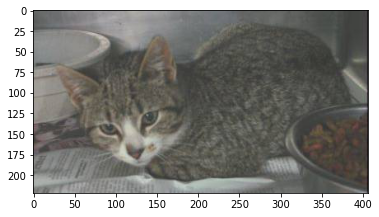

In [ ]:
plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

## AlexNet Architecture

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2,activation='softmax')    
])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization_10 (Bat  (None, 14, 14, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_11 (Bat  (None, 7, 7, 256)        1024      
 chNormalization)                                                
                                                      

In [ ]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
100/100 [==============================] - 9s 79ms/step - loss: 2.0022 - acc: 0.5355 - val_loss: 1.7220 - val_acc: 0.5010
Epoch 2/5
100/100 [==============================] - 9s 92ms/step - loss: 0.7345 - acc: 0.5020 - val_loss: 0.6884 - val_acc: 0.5350
Epoch 3/5
100/100 [==============================] - 8s 78ms/step - loss: 0.6970 - acc: 0.5005 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 4/5
100/100 [==============================] - 8s 77ms/step - loss: 0.6945 - acc: 0.4670 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 5/5
100/100 [==============================] - 8s 79ms/step - loss: 0.6940 - acc: 0.4925 - val_loss: 0.6939 - val_acc: 0.5000


In [ ]:
results_cats_and_dogs["AlexNet"] = {}
results_cats_and_dogs["AlexNet"]["Loss"] = history.history["loss"][-1]
results_cats_and_dogs["AlexNet"]["Accuracy"] = history.history["acc"][-1]
results_cats_and_dogs["AlexNet"]["Validation Loss"] = history.history["val_loss"][-1]
results_cats_and_dogs["AlexNet"]["Validation Accuracy"] = history.history["val_acc"][-1]
results_cats_and_dogs

{'AlexNet': {'Loss': 0.6939583420753479,
  'Accuracy': 0.4925000071525574,
  'Validation Loss': 0.6938546299934387,
  'Validation Accuracy': 0.5}}

## Newer CNN Architectures


1.   VGG16
2.   GoogleNet(InceptionNet)
3.   ResNet50
4.   EfficientNetB0
5.   MobileNetV2


In [ ]:
for Net in models:
    if Net == InceptionV3:

      train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(299, 299),
      batch_size=20,
      class_mode='categorical')

      validation_generator = val_datagen.flow_from_directory(
      validation_dir,
      target_size=(299, 299),
      batch_size=20,
      class_mode='categorical')

      base_model = Net(input_shape=(299,299,3), weights='imagenet', include_top=False)
      base_model.trainable = False

    else:
      train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(224, 224),
      batch_size=20,
      class_mode='categorical')

      validation_generator = val_datagen.flow_from_directory(
      validation_dir,
      target_size=(224, 224),
      batch_size=20,
      class_mode='categorical')

      base_model = Net(input_shape=(224,224,3), weights='imagenet', include_top=False)
      base_model.trainable = False
      
    model = tf.keras.Sequential([
      base_model,
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    model.summary()

    model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
    history = model.fit(train_generator, epochs=2, validation_data=validation_generator)

    results_cats_and_dogs[Net] = {}
    results_cats_and_dogs[Net]["Loss"] = history.history["loss"][-1]
    results_cats_and_dogs[Net]["Accuracy"] = history.history["acc"][-1]
    results_cats_and_dogs[Net]["Validation Loss"] = history.history["val_loss"][-1]
    results_cats_and_dogs[Net]["Validation Accuracy"] = history.history["val_acc"][-1]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 25088)             0         
                                                                 
 dense_17 (Dense)            (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/2
100/100 [==============================] - 21s 208ms/step - loss: 0.4520 - acc: 0.7985 - val_loss: 0.3355 - val_acc: 0.8770
Epoch 2/2
100/100 [==============================] - 21s 206ms/step - loss: 0.2760 

In [ ]:
results_cats_and_dogs_df = pd.DataFrame.from_dict(results_cats_and_dogs, orient="index")
results_cats_and_dogs_df

,Loss,Accuracy,Validation Loss,Validation Accuracy
AlexNet,0.693958,0.4925,0.693855,0.500
<function VGG16 at 0x7f954fac0710>,0.275961,0.9020,0.283474,0.891
<function InceptionV3 at 0x7f954fa94e60>,0.004381,0.9985,0.020426,0.993
<function ResNet50V2 at 0x7f954fabcdd0>,0.017940,0.9940,0.108862,0.970
<function EfficientNetB0 at 0x7f954fb05320>,0.728201,0.5005,0.693775,0.500
<function MobileNetV2 at 0x7f954fa9bd40>,0.009470,0.9980,0.092012,0.976


# Horse 2 Zebra

### Downloading Data

In [ ]:
!wget --no-check-certificate http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/horse2zebra.zip

--2022-08-23 06:05:24--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/horse2zebra.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘horse2zebra.zip’

horse2zebra.zip     100%[===================>] 111.45M  3.57MB/s    in 39s     

2022-08-23 06:06:03 (2.86 MB/s) - ‘horse2zebra.zip’ saved [116867962/116867962]



In [ ]:
local_zip = 'horse2zebra.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
!mkdir -v horse2zebra/train horse2zebra/validation
!mv -v horse2zebra/testA horse2zebra/testB horse2zebra/validation
!mv -v horse2zebra/trainA horse2zebra/trainB horse2zebra/train

mkdir: created directory 'horse2zebra/train'
mkdir: created directory 'horse2zebra/validation'
renamed 'horse2zebra/testA' -> 'horse2zebra/validation/testA'
renamed 'horse2zebra/testB' -> 'horse2zebra/validation/testB'
renamed 'horse2zebra/trainA' -> 'horse2zebra/train/trainA'
renamed 'horse2zebra/trainB' -> 'horse2zebra/train/trainB'


### Normalizing images and applying labels on images

In [ ]:
base_dir = 'horse2zebra'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_horses_dir = os.path.join(train_dir, 'trainA')

train_zebras_dir = os.path.join(train_dir, 'trainB')

validation_horses_dir = os.path.join(validation_dir, 'testA')

validation_zebras_dir = os.path.join(validation_dir, 'testB')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


In [ ]:
train_horses_fnames = os.listdir(train_horses_dir)
print(train_horses_fnames[:10])

train_zebras_fnames = os.listdir(train_zebras_dir)
train_zebras_fnames.sort()
print(train_zebras_fnames[:10])

['n02381460_3664.jpg', 'n02381460_2341.jpg', 'n02381460_2049.jpg', 'n02381460_4117.jpg', 'n02381460_5545.jpg', 'n02381460_155.jpg', 'n02381460_1227.jpg', 'n02381460_1486.jpg', 'n02381460_948.jpg', 'n02381460_4674.jpg']
['n02391049_10007.jpg', 'n02391049_10027.jpg', 'n02391049_1004.jpg', 'n02391049_10047.jpg', 'n02391049_10063.jpg', 'n02391049_101.jpg', 'n02391049_1012.jpg', 'n02391049_10122.jpg', 'n02391049_10123.jpg', 'n02391049_10129.jpg']


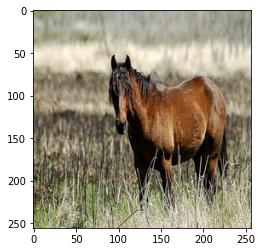

In [ ]:
plt.imshow(mpimg.imread(os.path.join(train_horses_dir, train_horses_fnames[0])))

## AlexNet Architecture

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2,activation='softmax')    
])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization_15 (Bat  (None, 14, 14, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_16 (Bat  (None, 7, 7, 256)        1024      
 chNormalization)                                                
                                                      

In [ ]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
121/121 [==============================] - 8s 56ms/step - loss: 2.3839 - acc: 0.5810 - val_loss: 5.0613 - val_acc: 0.5500
Epoch 2/5
121/121 [==============================] - 5s 42ms/step - loss: 1.3039 - acc: 0.5723 - val_loss: 0.8956 - val_acc: 0.5385
Epoch 3/5
121/121 [==============================] - 5s 45ms/step - loss: 1.1241 - acc: 0.5902 - val_loss: 0.6635 - val_acc: 0.5962
Epoch 4/5
121/121 [==============================] - 8s 64ms/step - loss: 0.6773 - acc: 0.5973 - val_loss: 0.9193 - val_acc: 0.6577
Epoch 5/5
121/121 [==============================] - 5s 45ms/step - loss: 0.6618 - acc: 0.5739 - val_loss: 0.7416 - val_acc: 0.4615


In [ ]:
results_horse2zebra["AlexNet"] = {}
results_horse2zebra["AlexNet"]["Loss"] = history.history["loss"][-1]
results_horse2zebra["AlexNet"]["Accuracy"] = history.history["acc"][-1]
results_horse2zebra["AlexNet"]["Validation Loss"] = history.history["val_loss"][-1]
results_horse2zebra["AlexNet"]["Validation Accuracy"] = history.history["val_acc"][-1]
results_horse2zebra

{'AlexNet': {'Loss': 0.6618479490280151,
  'Accuracy': 0.5739275217056274,
  'Validation Loss': 0.7415906190872192,
  'Validation Accuracy': 0.4615384638309479}}

## Newer CNN Architectures


1.   VGG16
2.   GoogleNet(InceptionNet)
3.   ResNet50
4.   EfficientNetB0
5.   MobileNetV2


In [ ]:
for Net in models:
    if Net == InceptionV3:

      train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(299, 299),
      batch_size=20,
      class_mode='categorical')

      validation_generator = val_datagen.flow_from_directory(
      validation_dir,
      target_size=(299, 299),
      batch_size=20,
      class_mode='categorical')

      base_model = Net(input_shape=(299,299,3), weights='imagenet', include_top=False)
      base_model.trainable = False

    else:
      train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(224, 224),
      batch_size=20,
      class_mode='categorical')

      validation_generator = val_datagen.flow_from_directory(
      validation_dir,
      target_size=(224, 224),
      batch_size=20,
      class_mode='categorical')

      base_model = Net(input_shape=(224,224,3), weights='imagenet', include_top=False)
      base_model.trainable = False
      
    model = tf.keras.Sequential([
      base_model,
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    model.summary()

    model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
    history = model.fit(train_generator, epochs=2, validation_data=validation_generator)

    results_horse2zebra[Net] = {}
    results_horse2zebra[Net]["Loss"] = history.history["loss"][-1]
    results_horse2zebra[Net]["Accuracy"] = history.history["acc"][-1]
    results_horse2zebra[Net]["Validation Loss"] = history.history["val_loss"][-1]
    results_horse2zebra[Net]["Validation Accuracy"] = history.history["val_acc"][-1]

Found 2401 images belonging to 2 classes.
Found 260 images belonging to 2 classes.
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_14 (Flatten)        (None, 25088)             0         
                                                                 
 dense_22 (Dense)            (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/2
121/121 [==============================] - 20s 164ms/step - loss: 0.3206 - acc: 0.8742 - val_loss: 0.1734 - val_acc: 0.9462
Epoch 2/2
121/121 [==============================] - 19s 154ms/step - loss: 0.1502 

In [ ]:
results_horse2zebra_df = pd.DataFrame.from_dict(results_horse2zebra, orient="index")
results_horse2zebra_df

,Loss,Accuracy,Validation Loss,Validation Accuracy
AlexNet,0.661848,0.573928,0.741591,0.461538
<function VGG16 at 0x7f954fac0710>,0.150204,0.951687,0.130211,0.953846
<function InceptionV3 at 0x7f954fa94e60>,0.003108,0.999583,0.034527,0.988462
<function ResNet50V2 at 0x7f954fabcdd0>,0.014739,0.996668,0.121965,0.984615
<function EfficientNetB0 at 0x7f954fb05320>,0.750297,0.526447,0.768645,0.538462
<function MobileNetV2 at 0x7f954fa9bd40>,0.004313,0.999167,0.086611,0.984615
